In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [8]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])

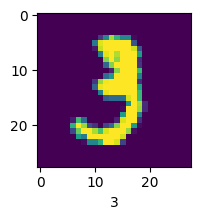

In [9]:
plot_sample(X_train, y_train, 10)

In [10]:
data_augmentation = keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2, input_shape=(28, 28, 1)),
])

In [11]:
model = models.Sequential([
    data_augmentation,

    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense

    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),

])

In [12]:
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)             

In [13]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 63s 32ms/step - loss: 0.3877 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1661 - accuracy: 0.9496
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1264 - accuracy: 0.9603
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1097 - accuracy: 0.9667
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0946 - accuracy: 0.9707


In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0786 - accuracy: 0.9760


[0.07859808951616287, 0.9760000109672546]

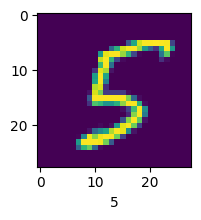

In [15]:
plot_sample(X_test, y_test, 23)

In [16]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [17]:
y_pred_numbers = [np.argmax(element) for element in y_pred]

In [18]:
y_pred_numbers[:20]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4]

In [19]:
print('Classification Report of this model: \n', classification_report(y_test, y_pred_numbers))

Classification Report of this model: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.94      0.96       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.99      0.94      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

